---

# Assignment Code: DA-AG-018

---

# Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies)
- Answer:
Anomaly detection is the process of identifying unusual patterns or behaviors in data that deviate significantly from the norm. These anomalies often indicate critical events such as fraud, system failures, or rare occurrences.

Point Anomaly:
A single data point significantly different from the rest.
Example: A sudden spike in credit card spending by a user.

Contextual Anomaly:
A data point abnormal only in a specific context (time, location, etc.).
Example: High electricity usage at night when normally it is low.

Collective Anomaly:
A group of data points collectively showing abnormal behavior, even if individual points seem normal.
Example: Multiple failed login attempts in a short period indicating a cyber-attack.



---

# Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
- Answer:

Isolation Forest (IF):

Approach: Works by randomly partitioning data points and isolating anomalies since they require fewer splits.

Use Cases: High-dimensional datasets, fraud detection, network intrusion detection.

Strength: Scales well to large datasets and works for both linear and nonlinear data.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Approach: Groups data points based on density; points in low-density areas are flagged as anomalies.

Use Cases: Spatial data, geographical analysis, detecting outliers in irregular clusters.

Strength: Handles clusters of arbitrary shape but struggles in high-dimensional data.

Local Outlier Factor (LOF):

Approach: Compares the local density of a point to its neighbors; points with lower density than neighbors are anomalies.

Use Cases: Datasets where local density variation matters, e.g., credit card fraud detection or sensor readings.

Strength: Good for detecting local anomalies but computationally expensive for large datasets.

---

# Question 3: What are the key components of a Time Series? Explain each with one example.
- A time series is a sequence of data points collected at successive time intervals. It typically has four key components:

Trend

Definition: The long-term progression of the series (upward, downward, or constant).

Example: The steady increase in the number of internet users worldwide over the years.

Seasonality

Definition: Patterns that repeat at fixed intervals due to seasonal effects.

Example: Electricity consumption rises every summer due to air conditioners.

Cyclic Component

Definition: Long-term fluctuations that occur due to economic, business, or social cycles (not strictly periodic).

Example: Stock market showing growth and decline phases due to economic cycles.

Irregular/Random (Noise)

Definition: Unpredictable variations caused by unexpected events.

Example: A sudden dip in airline passengers due to a natural disaster.

---


# Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
- A time series is called stationary when its statistical properties like mean, variance, and covariance do not change with time. In other words, the data should not have a trend or seasonality.

Example: If we record the daily noise level in a classroom (assuming conditions are the same), the fluctuations will stay around a fixed mean. This is stationary.

- How to test stationarity:

Plotting the series – visually check if trend or seasonality is present.

Rolling statistics – calculate moving average and variance, if they change over time then it is non-stationary.

Statistical tests – Augmented Dickey-Fuller (ADF) test is commonly used. If p-value < 0.05, we can say the series is stationary.

- How to make a series stationary:

Differencing – subtract current value from the previous value.

Log or square root transformation – helps stabilize variance.

Detrending – remove the trend component.

Seasonal adjustment – remove seasonality if present

---

# Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.
- AR (Auto-Regressive model):

Uses past values of the series to predict the future.

Example: Today’s stock price depends on yesterday’s and day before yesterday’s price.

MA (Moving Average model):

Uses past forecast errors (residuals) for prediction.

Example: Today’s value is adjusted based on how wrong the model was in the past.

ARIMA (AutoRegressive Integrated Moving Average):

Combination of AR and MA with differencing (“I” part) to make data stationary.

Useful for time series with trends.

SARIMA (Seasonal ARIMA):

Extension of ARIMA that also considers seasonality.

Example: Predicting sales which repeat every December.

SARIMAX (Seasonal ARIMA with Exogenous variables):

Like SARIMA but adds external factors (exogenous variables) into prediction.

Example: Forecasting electricity demand using past demand + weather conditions.



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


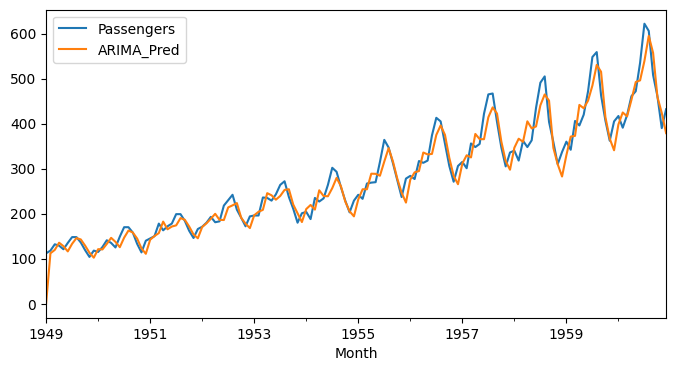

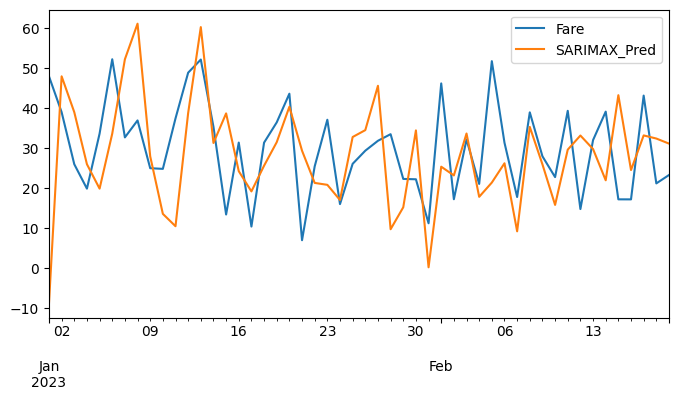

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- ARIMA on AirPassengers (CSV version) ---
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

arima = ARIMA(data['Passengers'], order=(2,1,2)).fit()
data['ARIMA_Pred'] = arima.fittedvalues
data[['Passengers','ARIMA_Pred']].plot(figsize=(8,4))
plt.show()

# --- SARIMAX on sample NYC Taxi fares ---
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=50)
fare = np.random.randint(10,50,50) + 5*np.sin(np.linspace(0,10,50))
weather = np.random.randint(0,2,50)
taxi = pd.DataFrame({'Fare':fare,'Weather':weather}, index=dates)

sarimax = SARIMAX(taxi['Fare'], order=(1,1,1), seasonal_order=(1,1,1,7),
                  exog=taxi[['Weather']]).fit(disp=False)
taxi['SARIMAX_Pred'] = sarimax.fittedvalues
taxi[['Fare','SARIMAX_Pred']].plot(figsize=(8,4))
plt.show()



---

---

# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.
-


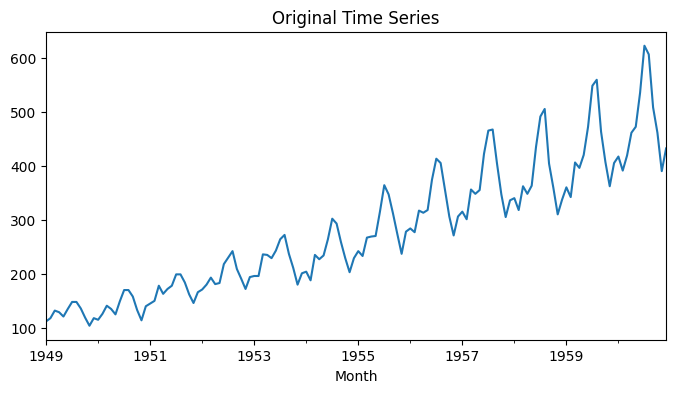

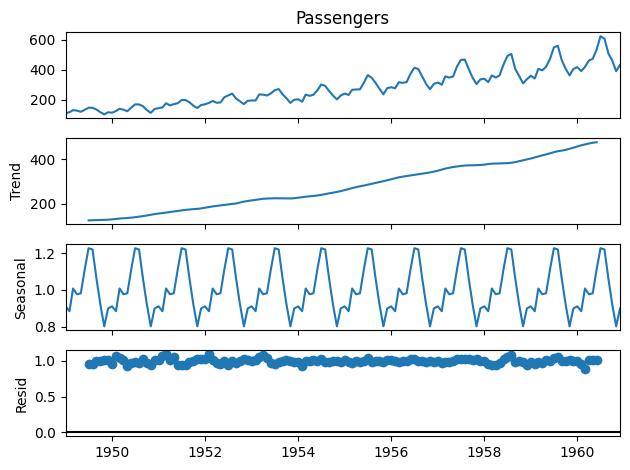

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset from online CSV
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot original series
data['Passengers'].plot(title='Original Time Series', figsize=(8,4))
plt.show()

# Decompose the time series
decomp = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomp.plot()
plt.show()


---

# Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
-



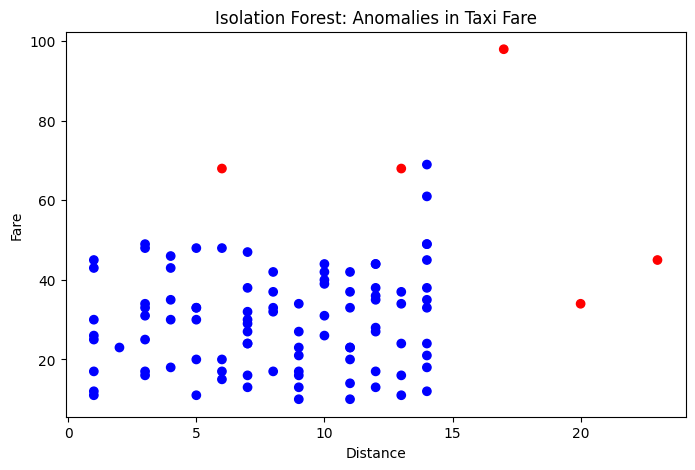

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Simulate NYC Taxi Fare data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100)
fare = np.random.randint(10,50,100)
distance = np.random.randint(1,15,100)
# Inject some anomalies
fare[::20] = fare[::20] + 50
distance[::25] = distance[::25] + 10

taxi = pd.DataFrame({'Fare': fare, 'Distance': distance}, index=dates)

# Apply Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
taxi['Anomaly'] = iso.fit_predict(taxi)

# Plot
plt.figure(figsize=(8,5))
colors = taxi['Anomaly'].map({1:'blue', -1:'red'})
plt.scatter(taxi['Distance'], taxi['Fare'], c=colors)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.title('Isolation Forest: Anomalies in Taxi Fare')
plt.show()


---

# Question 8: Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.
-


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


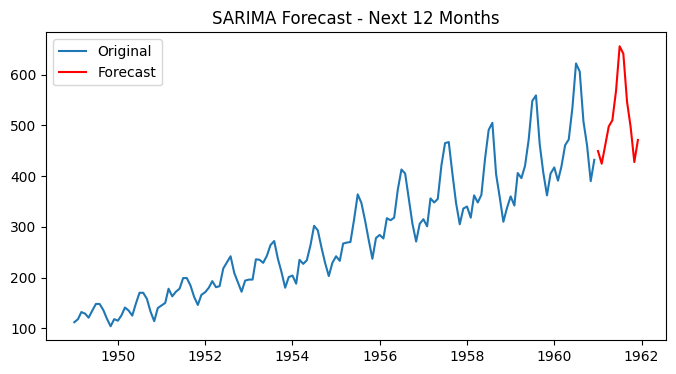

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load AirPassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Fit SARIMA model (seasonal order yearly)
model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit(disp=False)

# Forecast next 12 months
forecast = result.get_forecast(steps=12)
forecast_index = pd.date_range(data.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot
plt.figure(figsize=(8,4))
plt.plot(data['Passengers'], label='Original')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('SARIMA Forecast - Next 12 Months')
plt.legend()
plt.show()


---

# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
-


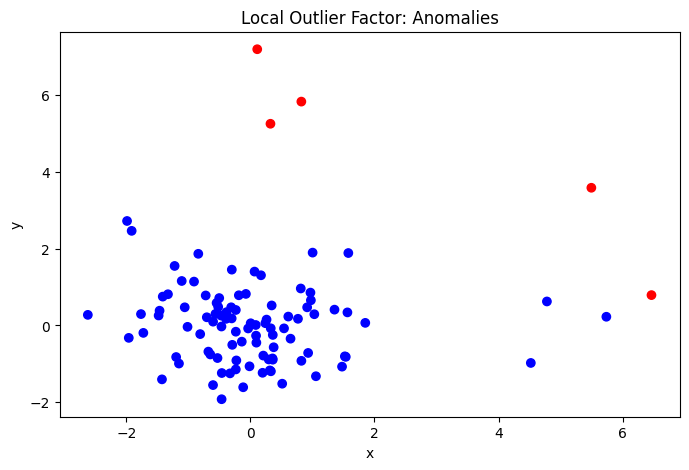

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Simulate a small dataset
np.random.seed(42)
x = np.random.randn(100)
y = np.random.randn(100)
# Add anomalies
x[::20] += 5
y[::25] += 5

data = pd.DataFrame({'x': x, 'y': y})

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
data['LOF'] = lof.fit_predict(data)

# Plot
plt.figure(figsize=(8,5))
colors = data['LOF'].map({1:'blue', -1:'red'})
plt.scatter(data['x'], data['y'], c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Local Outlier Factor: Anomalies')
plt.show()


---

# Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?



/tmp/ipython-input-4043814359.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range('2023-01-01', periods=192, freq='15T')


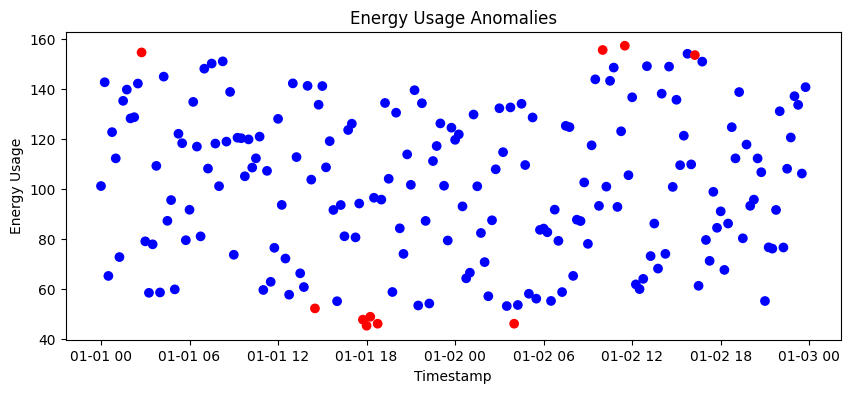

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simulate energy usage data (15-min intervals for 2 days)
np.random.seed(42)
timestamps = pd.date_range('2023-01-01', periods=192, freq='15T')
usage = np.random.randint(50, 150, 192) + 10*np.sin(np.linspace(0,10,192))
weather = np.random.randint(0,2,192)  # exogenous feature

data = pd.DataFrame({'Usage': usage, 'Weather': weather}, index=timestamps)

# --- Anomaly Detection ---
iso = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = iso.fit_predict(data[['Usage']])

# Plot anomalies
plt.figure(figsize=(10,4))
colors = data['Anomaly'].map({1:'blue', -1:'red'})
plt.scatter(data.index, data['Usage'], c=colors)
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.title('Energy Usage Anomalies')
plt.show()

# --- Short-term Forecast using SARIMAX ---
model = SARIMAX(data['Usage'], order=(1,1,1), seasonal_order=(1,1,1,96), exog=data[['Weather']])
result = model.fit(disp=False)
forecast = result.get_forecast(steps=48, exog=pd.DataFrame({'Weather': np.random.randint(0,2,48)}))
forecast_series = pd.Series(forecast.predicted_mean.values, index=pd.date_range(data.index[-1]+pd.Timedelta(minutes=15), periods=48, freq='15T'))

# Plot forecast
plt.figure(figsize=(10,4))
plt.plot(data['Usage'], label='Actual')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Short-term Energy Usage Forecast')
plt.legend()
plt.show()


---